In [2]:
import sys
sys.path.append('../..')
from common import *
%matplotlib inline

{'sampling_rate': 16000, 'duration': 1, 'hop_length': 253, 'fmin': 20, 'fmax': 8000, 'n_mels': 64, 'n_fft': 1280, 'model': 'alexnet', 'labels': ['AfricanPiedWagtail', 'BarnSwallow', 'BlackWoodpecker', 'BlackheadedGull', 'CanadaGoose', 'CarrionCrow', 'CoalTit', 'CommonBlackbird', 'CommonChaffinch', 'CommonChiffchaff', 'CommonCuckoo', 'CommonHouseMartin', 'CommonLinnet', 'CommonMoorhen', 'CommonNightingale', 'CommonPheasant', 'CommonRedpoll', 'CommonRedshank', 'CommonRedstart', 'CommonReedBunting', 'CommonSnipe', 'CommonStarling', 'CommonSwift', 'CommonWhitethroat', 'CommonWoodPigeon', 'CornBunting', 'Dunlin', 'Dunnock', 'EurasianBlackcap', 'EurasianBlueTit', 'EurasianBullfinch', 'EurasianCollaredDove', 'EurasianCoot', 'EurasianGreenfinch', 'EurasianJay', 'EurasianMagpie', 'EurasianNuthatch', 'EurasianOystercatcher', 'EurasianReedWarbler', 'EurasianSkylark', 'EurasianTreeSparrow', 'EurasianTreecreeper', 'EurasianWren', 'EurasianWryneck', 'EuropeanBeeEater', 'EuropeanGoldenPlover', 'Europ

Using TensorFlow backend.


In [3]:
model = create_model(conf)

Model: AlexNet based


In [4]:
model.load_weights('model_alexbased_on_fsd.h5')

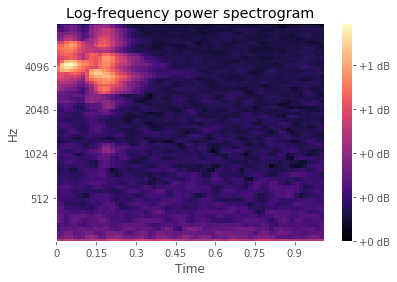

In [5]:
X = load_sample_as_X(conf, './data/data/BarnSwallow/xc157279.wav', trim_long_data=False)
show_melspectrogram(conf, X[1, ..., -1])

In [6]:
preds = model.predict(X)
for pred in preds:
    result = np.argmax(pred)
    print(conf.labels[result], result)

BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
AfricanPiedWagtail 0
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
AfricanPiedWagtail 0
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSw

In [7]:
# load tensorflow and keras backend
import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
ksess = K.get_session()
print(ksess)

# transform keras model to tensorflow graph
# the output will be json-like format
K.set_learning_phase(0)
graph = ksess.graph
kgraph = graph.as_graph_def()
print(kgraph)

node {
  name: "conv2d_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 64
        }
        dim {
          size: 64
        }
        dim {
          size: 1
        }
      }
    }
  }
}
node {
  name: "conv2d_1/random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 4
          }
        }
        tensor_content: "\013\000\000\000\013\000\000\000\001\000\000\0000\000\000\000"
      }
    }
  }
}
node {
  name: "conv2d_1/random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
  

In [8]:
import os
num_output = 1
prefix = "output"
pred = [None]*num_output
outputName = [None]*num_output
for i in range(num_output):
    outputName[i] = prefix + str(i)
    pred[i] = tf.identity(model.get_output_at(i), name=outputName[i])
print('output name: ', outputName)

# convert variables in the model graph to constants
constant_graph = graph_util.convert_variables_to_constants(ksess, ksess.graph.as_graph_def(), outputName)

# save the model in .pb and .txt
output_dir = "./"
output_graph_name = "bird-listener.pb"
output_text_name = "bird-listener.txt"
graph_io.write_graph(constant_graph, output_dir, output_graph_name, as_text=False)
graph_io.write_graph(constant_graph, output_dir, output_text_name, as_text=True)
print('saved graph .pb at: {0}\nsaved graph .txt at: {1}'.format(
        os.path.join(output_dir, output_graph_name),
        os.path.join(output_dir, output_text_name)))

output name:  ['output0']
INFO:tensorflow:Froze 28 variables.
INFO:tensorflow:Converted 28 variables to const ops.
saved graph .pb at: ./bird-listener.pb
saved graph .txt at: ./bird-listener.txt


In [9]:
def load_graph(model_file):
    graph = tf.Graph()
    graph_def = tf.GraphDef()

    with open(model_file, "rb") as f:
        graph_def.ParseFromString(f.read())
    with graph.as_default():
        tf.import_graph_def(graph_def)
    return graph

tfmodel = load_graph(os.path.join(output_dir, output_graph_name))

In [10]:
opers = tfmodel.get_operations()
names = [oper.name for oper in opers]
for name in names:
    if 0 <= name.find('keras') or 0 <= name.find('input') or 0 <= name.find('output'):
        print(name)

import/conv2d_1_input
import/batch_normalization_1/keras_learning_phase/input
import/batch_normalization_1/keras_learning_phase
import/output0


In [12]:
inLayer = tfmodel.get_operation_by_name('import/conv2d_1_input')
learnPhase = tfmodel.get_operation_by_name('import/batch_normalization_1/keras_learning_phase')
outLayer = tfmodel.get_operation_by_name('import/output0')

In [13]:
with tf.Session(graph=tfmodel) as sess:
    tf_preds = sess.run(outLayer.outputs[0], 
                       {inLayer.outputs[0]: X,
                        learnPhase.outputs[0]: 0})
for pred in tf_preds:
    result = np.argmax(pred)
    print(conf.labels[result], result)

BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
AfricanPiedWagtail 0
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
AfricanPiedWagtail 0
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSwallow 1
BarnSw